<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
panelapath = glob.glob('../../data_final/SM_fig3_panel_Is.pkl')
panel_a = pickle.load(open(panelapath[0],'rb'))
panel_a.keys()

dict_keys(['xmeas', 'ymeas', 'ymeaslabel', 'xtheo', 'ytheo', 'ytheolabel', 'xtheo2', 'ytheo2', 'ytheolabel2', 'xlabel', 'ylabel'])

In [4]:
panelbpath = glob.glob('../../data_final/SM_fig3_panel_df.pkl')
panel_b = pickle.load(open(panelbpath[0],'rb'))
panel_b.keys()

dict_keys(['xmeas', 'ymeas', 'ymeaslabel', 'xtheo', 'ytheo', 'ytheolabel', 'xlabel', 'ylabel'])

In [5]:
panelcpath = glob.glob('../../data_final/SM_fig3_panel_Ppump.pkl')
panel_c = pickle.load(open(panelcpath[0],'rb'))
panel_c.keys()

dict_keys(['xmeas', 'ymeas', 'ymeaslabel', 'xtheo', 'ytheo', 'ytheolabel', 'xtheo2', 'ytheo2', 'ytheolabel2', 'xlabel', 'ylabel'])

In [6]:
panelspectrumpath = glob.glob('../../data_final/SM_spectrum_higher_order.pkl')
panel_spectrum = pickle.load(open(panelspectrumpath[0],'rb'))
panel_spectrum.keys()

dict_keys(['x', 'y', 'ymax', 'iset', 'ppump', 'xlabel', 'ylabel'])

In [7]:
dpi = 1000
figtextsize=10

In [8]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

In [9]:
# we need to format the xticks if we want to display plus signs
# taken from https://stackoverflow.com/questions/35415757/adding-sign-to-exponent-in-matplotlib-axes

import matplotlib.ticker as ticker
# this is the function the FuncFormatter will use
def myfmt(x,pos):
    if x <= 0:
        # negative sign is added automatically  
        return u"{:.0f}".format(x)
    else:
        # we need to explicitly add the positive sign
        return u"+{:.0f}".format(x)

# Define the formatter
formatter = ticker.FuncFormatter(myfmt)

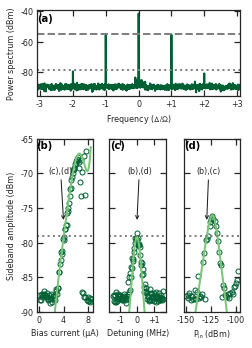

In [11]:
plt.style.use('../my_rcparams.mplstyle')

camp = -79
ymin = -90
ymax = -65

fig = plt.figure(figsize=cm2inch(8.6,12),constrained_layout=True)
gs = fig.add_gridspec(2, 3, height_ratios=[1,2])

axa = fig.add_subplot(gs[1,0])
plt.axhline(camp,c='grey',ls='dotted')
plt.plot(panel_a['xmeas'],panel_a['ymeas'],'o',markerfacecolor='none',c=cmap(0.1),zorder=-1)
plt.plot(panel_a['xtheo2'],panel_a['ytheo2'],c=cmap(0.5),zorder=-1)
plt.xlabel(panel_a['xlabel'])
plt.ylabel('Sideband amplitude (dBm)')
plt.ylim(ymin,ymax)
plt.xticks([0,4,8])
alims = plt.gca().get_ylim()
plt.annotate("(c),(d)", xy=(4, -70-7), xytext=(1.5, -70),arrowprops=dict(arrowstyle="->",color='k'))

axb = fig.add_subplot(gs[1,1])
# plt.axhline(max(panel_b['ymeas']),c='grey',ls='dashed')
plt.axhline(camp,c='grey',ls='dotted')
maxm = np.argmax(panel_b['ymeas'].values)
maxt = np.argmax(panel_b['ytheo'])
plt.plot((panel_b['xmeas']-panel_b['xmeas'][maxm])/1e3,panel_b['ymeas'],'o',markerfacecolor='none',c=cmap(0.1),zorder=-1)
plt.plot((panel_b['xtheo']-panel_b['xtheo'][maxt])/1e3,panel_b['ytheo'],c=cmap(0.5),zorder=-1)
plt.xlabel('Detuning (MHz)')
plt.gca().set_yticklabels([])
# plt.xticks([-1500,-750,0,750,1500])
plt.gca().xaxis.set_major_formatter(formatter)
plt.annotate("(b),(d)", xy=(0, -70-7), xytext=(-.600, -70),arrowprops=dict(arrowstyle="->",color='k'))
plt.ylim(alims)

axc = fig.add_subplot(gs[1,2])
plt.axhline(camp,c='grey',ls='dotted')
plt.plot(panel_c['xmeas'],panel_c['ymeas'],'o',markerfacecolor='none',c=cmap(0.1),zorder=-1)
plt.plot(panel_c['xtheo'],panel_c['ytheo'],c=cmap(0.5),zorder=-1)
plt.xlabel('P$_\mathrm{in}$ (dBm)')
plt.xticks([-150,-125,-100])
# plt.ylabel('Sideband amplitude (dBm)')
plt.gca().set_yticklabels([])
plt.annotate("(b),(c)", xy=(-129, -70-7), xytext=(-139, -70),arrowprops=dict(arrowstyle="->",color='k'))
plt.ylim(alims)

axd = fig.add_subplot(gs[0,:])
plt.axhline(camp,c='grey',ls='dotted')
plt.axhline(-55,c='grey',ls='dashed')
plt.plot(panel_spectrum['x'],panel_spectrum['y'],c=cmap(0.1),zorder=-1)
plt.xlabel('Frequency ($\Delta/\Omega$)')
plt.gca().xaxis.set_major_formatter(formatter)
plt.ylabel('Power spectrum (dBm)')
plt.xlim(-3.1,3.1)
    
axa.text(0.14,0.96, '(b)', fontsize=figtextsize, color='black', weight='bold',transform=axa.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axb.text(0.14,0.96, '(c)', fontsize=figtextsize, color='black', weight='bold', transform=axb.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axc.text(0.14,0.96, '(d)', fontsize=figtextsize, color='black', weight='bold', transform=axc.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axd.text(0.04,0.9, '(a)', fontsize=figtextsize, color='black', weight='bold', transform=axd.transAxes, verticalalignment = 'center', horizontalalignment = 'center')

plt.savefig('SM_second_order_peak.pdf',bbox_inches='tight',dpi=dpi)
plt.show()
plt.close()